RAW DATA LABELING AND UPLOADING CSV FILE

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ITSM_data2.csv')

# Displaying the first few rows
print(df.head())

     CI_Name          CI_Cat              CI_Subcat        WBS Incident_ID  \
0  SUB000508  subapplication  Web Based Application  WBS000162   IM0000004   
1  WBA000124     application  Web Based Application  WBS000088   IM0000005   
2  DTA000024     application    Desktop Application  WBS000092   IM0000006   
3  WBA000124     application  Web Based Application  WBS000088   IM0000011   
4  WBA000124     application  Web Based Application  WBS000088   IM0000012   

   Status Impact Urgency  Priority                 Category  ...  \
0  Closed      4       4       4.0                 incident  ...   
1  Closed      3       3       3.0                 incident  ...   
2  Closed     NS       3       NaN  request for information  ...   
3  Closed      4       4       4.0                 incident  ...   
4  Closed      4       4       4.0                 incident  ...   

        Reopen_Time     Resolved_Time        Close_Time Handle_Time_hrs  \
0               NaN  04-11-2013 13:50  04-11-20

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import csv

# Reading a CSV file
with open('ITSM_data2.csv', mode='r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

Streaming output truncated to the last 5000 lines.
['SUB000533', 'subapplication', 'Web Based Application', 'WBS000073', 'IM0041958', 'Closed', '4', '4', '4', 'incident', 'KM0000830', 'closed', '3', '07-03-2014 11:06', '', '18-03-2014 10:24', '18-03-2014 10:24', '1,76,93,61,111', 'Software', '1', 'SD0128662', '', '', '']
['SBA000607', 'application', 'Server Based Application', 'WBS000263', 'IM0041959', 'Closed', '4', '4', '4', 'incident', 'KM0002305', 'closed', '2', '07-03-2014 11:15', '', '07-03-2014 13:19', '07-03-2014 13:19', '2,05,94,44,444', 'Other', '1', 'SD0128675', '', '', '']
['SBA000263', 'application', 'Server Based Application', 'WBS000072', 'IM0041960', 'Closed', '5', '5', '5', 'request for information', 'KM0002245', 'closed', '2', '07-03-2014 11:17', '', '12-03-2014 10:29', '12-03-2014 10:29', '3,07,05,27,778', 'Other', '1', 'SD0128679', '', '', '']
['WBA000133', 'application', 'Web Based Application', 'WBS000073', 'IM0041961', 'Closed', '5', '5', '5', 'request for inform

In [5]:
df.shape

(46606, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   Category                    46606 non-null  object 
 10  KB_number                   46606 non-null  object 
 11  Alert_Status                46606 non-null  object 
 12  No_of_Reassignments         46605 non-null  float64
 13  Open_Time                   466

removes Unnecessary columns

In [7]:
df.drop(df.columns[[3,5,10,11,12,13,14,15,16,17,18,19,20,22,23]], axis = 1, inplace = True)
df.head()
df.to_csv('updated_dataframe.csv', index=False)


In [8]:
df1=df
df1.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents
0,SUB000508,subapplication,Web Based Application,IM0000004,4,4,4.0,incident,2.0
1,WBA000124,application,Web Based Application,IM0000005,3,3,3.0,incident,1.0
2,DTA000024,application,Desktop Application,IM0000006,NS,3,NaN,request for information,NaN
3,WBA000124,application,Web Based Application,IM0000011,4,4,4.0,incident,NaN
4,WBA000124,application,Web Based Application,IM0000012,4,4,4.0,incident,NaN


In [9]:
# First lets see how many missing values are there
# Missing Values count in each column
missing_count = (df1.isnull().sum()/len(df1))*100
# Applying filter for missing values
missing_count = missing_count[missing_count>0]
print(missing_count.sort_values())

CI_Cat                      0.238167
CI_Subcat                   0.238167
Priority                    2.960992
No_of_Related_Incidents    97.378020
dtype: float64


In [10]:
df1 = df1.replace('', np.nan)
df1 = df1.replace('NS',np.nan)
df1 = df1.replace('NA',np.nan)


In [11]:
# First lets see how many missing values are there
# Missing Values count in each column
missing_count = (df1.isnull().sum()/len(df1))*100
# Applying filter for missing values
missing_count = missing_count[missing_count>0]
print(missing_count.sort_values())

CI_Cat                      0.238167
CI_Subcat                   0.238167
Impact                      2.960992
Priority                    2.960992
No_of_Related_Incidents    97.378020
dtype: float64


In [12]:
# replacing na values in catogory,subcategory
df1["CI_Cat"].fillna("No Cat", inplace = True)
df1["CI_Subcat"].fillna("No Subcat", inplace = True)
#df1["Priority"].fillna(df1["Priority"],inplace = True)
#df1['Impact'] = df1['Impact'].replace('NS',0)
col = ['Impact']
df1.loc[:,col] = df1.loc[:,col].ffill()
col = ['Priority']
df1.loc[:,col] = df1.loc[:,col].ffill()
print(df1.head())
#df1.Impact = df1.Impact.astype(int)
#df1["Impact"].fillna(df1["Impact"].mode(),inplace = True)
df1['No_of_Related_Incidents'].fillna(0,inplace = True)
#df1.Priority = df1.Priority.astype(int)

     CI_Name          CI_Cat              CI_Subcat Incident_ID Impact  \
0  SUB000508  subapplication  Web Based Application   IM0000004      4   
1  WBA000124     application  Web Based Application   IM0000005      3   
2  DTA000024     application    Desktop Application   IM0000006      3   
3  WBA000124     application  Web Based Application   IM0000011      4   
4  WBA000124     application  Web Based Application   IM0000012      4   

  Urgency  Priority                 Category  No_of_Related_Incidents  
0       4       4.0                 incident                      2.0  
1       3       3.0                 incident                      1.0  
2       3       3.0  request for information                      NaN  
3       4       4.0                 incident                      NaN  
4       4       4.0                 incident                      NaN  


In [14]:
df1.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents
0,SUB000508,subapplication,Web Based Application,IM0000004,4,4,4.0,incident,2.0
1,WBA000124,application,Web Based Application,IM0000005,3,3,3.0,incident,1.0
2,DTA000024,application,Desktop Application,IM0000006,3,3,3.0,request for information,0.0
3,WBA000124,application,Web Based Application,IM0000011,4,4,4.0,incident,0.0
4,WBA000124,application,Web Based Application,IM0000012,4,4,4.0,incident,0.0


In [15]:
# First lets see how many missing values are there
# Missing Values count in each column
missing_count = (df1.isnull().sum()/len(df1))*100
# Applying filter for missing values
missing_count = missing_count[missing_count>0]
print(missing_count.sort_values())

Series([], dtype: float64)


In [16]:
# df1.to_excel('ABCTECH4.xlsx',index = False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CI_Name                  46606 non-null  object 
 1   CI_Cat                   46606 non-null  object 
 2   CI_Subcat                46606 non-null  object 
 3   Incident_ID              46606 non-null  object 
 4   Impact                   46606 non-null  object 
 5   Urgency                  46606 non-null  object 
 6   Priority                 46606 non-null  float64
 7   Category                 46606 non-null  object 
 8   No_of_Related_Incidents  46606 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.2+ MB


In [17]:
# Lable Encoding the Columns
from sklearn.preprocessing import LabelEncoder
CI_Name_Encoder = LabelEncoder()
CI_Name_Encoder.fit(df1['CI_Name'])
df1['CI_Name'] = CI_Name_Encoder.transform(df1['CI_Name'])
CI_Cat_Encoder = LabelEncoder()
CI_Cat_Encoder.fit(df1['CI_Cat'])
df1['CI_Cat'] = CI_Cat_Encoder.transform(df1['CI_Cat'])
CI_Subcat_Encoder = LabelEncoder()
CI_Subcat_Encoder.fit(df1['CI_Subcat'])
df1['CI_Subcat'] = CI_Subcat_Encoder.transform(df1['CI_Subcat'])
df1.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents
0,2741,12,58,IM0000004,4,4,4.0,incident,2.0
1,2863,2,58,IM0000005,3,3,3.0,incident,1.0
2,990,2,10,IM0000006,3,3,3.0,request for information,0.0
3,2863,2,58,IM0000011,4,4,4.0,incident,0.0
4,2863,2,58,IM0000012,4,4,4.0,incident,0.0


In [18]:
Category_Encoder = LabelEncoder()
Category_Encoder.fit(df1['Category'])
df1['Category'] = Category_Encoder.transform(df1['Category'])
#df1['Priority'] = df1['Priority'].replace('NA',0)
#df1.Priority = df1.Priority.astype(int)
#df1["Priority"].fillna(df1["Priority"].mean(),inplace = True)

df1.Priority = df1.Priority.astype(int)
df1.No_of_Related_Incidents = df1.No_of_Related_Incidents.astype(int)
df1.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents
0,2741,12,58,IM0000004,4,4,4,1,2
1,2863,2,58,IM0000005,3,3,3,1,1
2,990,2,10,IM0000006,3,3,3,3,0
3,2863,2,58,IM0000011,4,4,4,1,0
4,2863,2,58,IM0000012,4,4,4,1,0


In [19]:
import re
new = df1["Incident_ID"].str.split("([a-zA-Z]+)([0-9]+)", n = 1, expand = True)
df1["Incident_Digits"]=new[2]
df1['Incident_IM']= new[1]
df1.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents,Incident_Digits,Incident_IM
0,2741,12,58,IM0000004,4,4,4,1,2,0000004,IM
1,2863,2,58,IM0000005,3,3,3,1,1,0000005,IM
2,990,2,10,IM0000006,3,3,3,3,0,0000006,IM
3,2863,2,58,IM0000011,4,4,4,1,0,0000011,IM
4,2863,2,58,IM0000012,4,4,4,1,0,0000012,IM


In [20]:
#df1['p1p2'] = np.where((df1['Priority']<=2), 1, 0)
# Dropping rows with priority equals to 4 0r greater
#df1.drop(df1.loc[df1['Urgency']=='5 - Very Low'].index, inplace=True)
df1.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents,Incident_Digits,Incident_IM
0,2741,12,58,IM0000004,4,4,4,1,2,0000004,IM
1,2863,2,58,IM0000005,3,3,3,1,1,0000005,IM
2,990,2,10,IM0000006,3,3,3,3,0,0000006,IM
3,2863,2,58,IM0000011,4,4,4,1,0,0000011,IM
4,2863,2,58,IM0000012,4,4,4,1,0,0000012,IM


In [21]:
df1.reset_index(inplace=True)
df1.head()

,index,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents,Incident_Digits,Incident_IM
0,0,2741,12,58,IM0000004,4,4,4,1,2,0000004,IM
1,1,2863,2,58,IM0000005,3,3,3,1,1,0000005,IM
2,2,990,2,10,IM0000006,3,3,3,3,0,0000006,IM
3,3,2863,2,58,IM0000011,4,4,4,1,0,0000011,IM
4,4,2863,2,58,IM0000012,4,4,4,1,0,0000012,IM


In [22]:
#df1.to_excel('ABCTECH_DATA1.xlsx',index = False)
IM_Encoder = LabelEncoder()
IM_Encoder.fit(df1['Incident_IM'])
df1['Incident_IM'] = IM_Encoder.transform(df1['Incident_IM'])

df2=df1.drop(['index'], axis = 1)
df2.head()
df1.to_csv('updated_dataframe_cleaned.csv', index=False)

print("New CSV file saved as 'updated_dataframe_cleaned.csv'")

New CSV file saved as 'updated_dataframe_cleaned.csv'


In [23]:
missing_count = (df1.isnull().sum()/len(df1))*100
# Applying filter for missing values
missing_count = missing_count[missing_count>0]
print(missing_count.sort_values())

df2.describe()

Series([], dtype: float64)


,CI_Name,CI_Cat,CI_Subcat,Priority,Category,No_of_Related_Incidents,Incident_IM
count,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.000000,46606.0
mean,2239.249646,4.130284,42.513990,4.213427,1.379393,0.043771,0.0
std,752.110484,3.841185,17.415309,0.706796,0.784568,0.602799,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
25%,2269.000000,2.000000,43.000000,4.000000,1.000000,0.000000,0.0
50%,2487.000000,2.000000,46.000000,4.000000,1.000000,0.000000,0.0
75%,2725.000000,4.000000,58.000000,5.000000,1.000000,0.000000,0.0
max,3018.000000,12.000000,64.000000,5.000000,3.000000,63.000000,0.0


<Axes: >

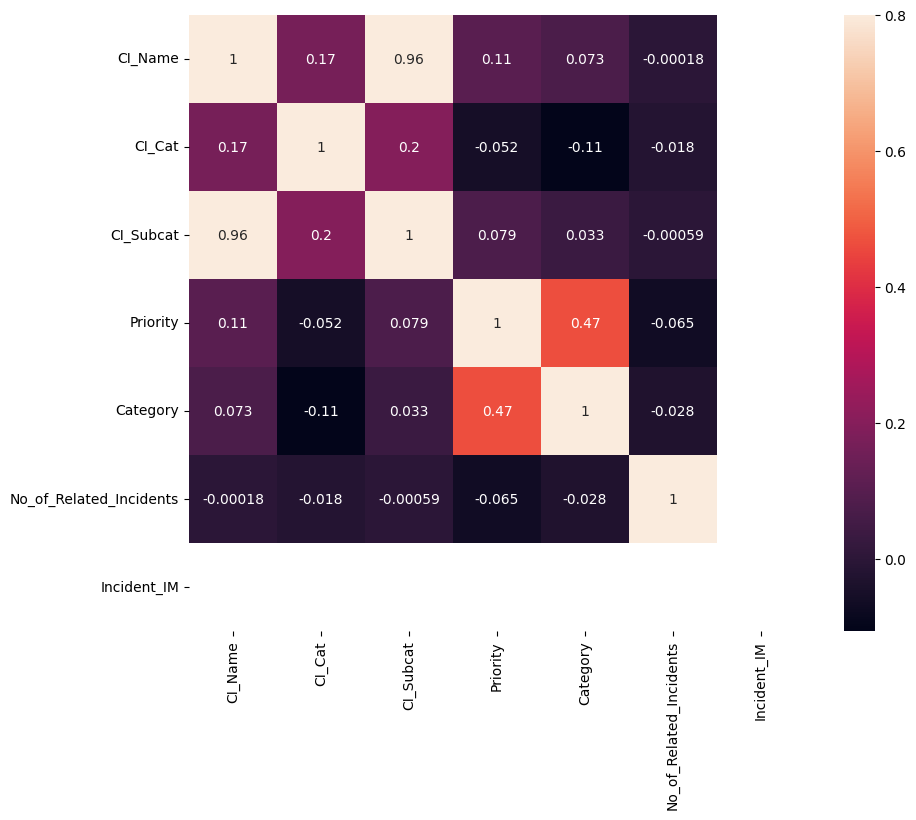

In [24]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# Convert 'CI_Name' column to numerical representation using LabelEncoder
encoder = LabelEncoder() # Initialize a LabelEncoder object
df2['CI_Name'] = encoder.fit_transform(df2['CI_Name']) # Fit and transform the 'CI_Name' column

corrmat = df2.corr(numeric_only=True) # Calculate correlation matrix with numeric_only parameter
f,ax = plt.subplots(figsize = (10,8))
sb.heatmap(corrmat,vmax = .8,square=True,annot=True)

In [25]:
#most correlated pairs of columns
corr = df2.corr(numeric_only=True) # df2 is the pandas dataframe, use numeric_only parameter to calculate correlation for numerical columns
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

,,0
CI_Name,CI_Name,1.000000
CI_Cat,CI_Cat,1.000000
Category,Category,1.000000
Priority,Priority,1.000000
CI_Subcat,CI_Subcat,1.000000
No_of_Related_Incidents,No_of_Related_Incidents,1.000000
CI_Name,CI_Subcat,0.955909
CI_Subcat,CI_Name,0.955909
Category,Priority,0.467197
Priority,Category,0.467197


<Axes: xlabel='Priority', ylabel='CI_Cat'>

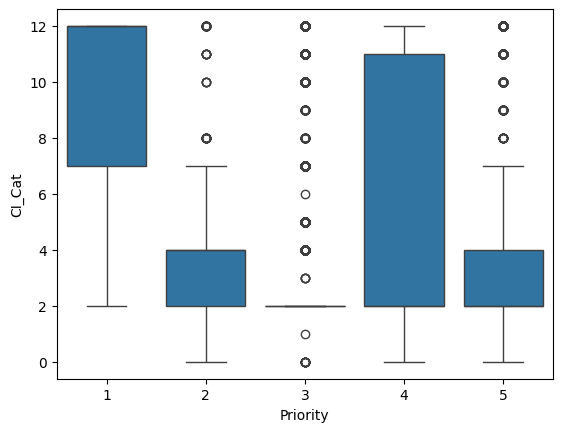

In [26]:
#CI_cat vs priority
sb.boxplot(x = df2['Priority'],y = df2['CI_Cat'])

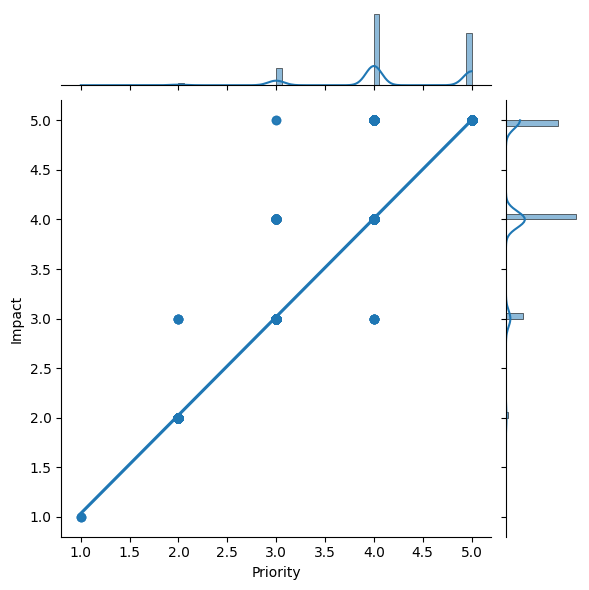

In [27]:
# Impact and priority
# Convert 'Priority' and 'Impact' columns to numeric type
df2['Priority'] = pd.to_numeric(df2['Priority'])
df2['Impact'] = pd.to_numeric(df2['Impact'])

sb.jointplot(x=df2['Priority'], y=df2['Impact'], kind='reg')

<Axes: xlabel='Priority', ylabel='Urgency'>

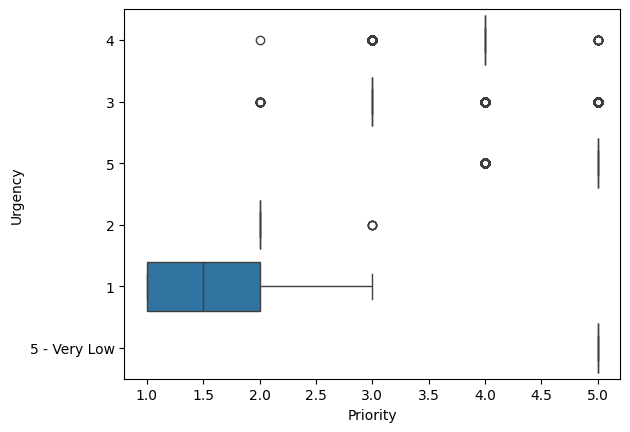

In [28]:
#urgency and priority
sb.boxplot(x = df2['Priority'],y = df2['Urgency'])

<Axes: xlabel='Priority', ylabel='No_of_Related_Incidents'>

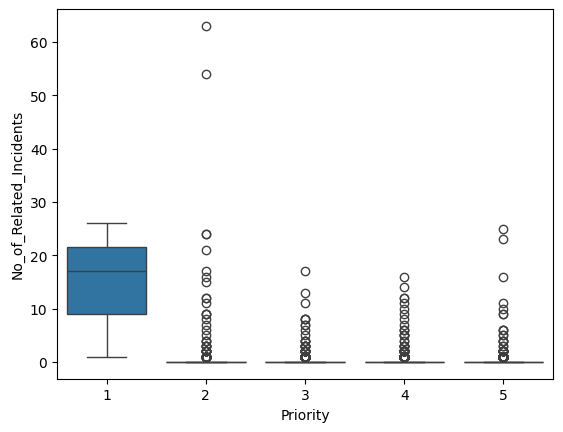

In [29]:
#no_related_incedents vs priority
sb.boxplot(x = df2['Priority'],y = df2['No_of_Related_Incidents'])

In [30]:
df2.head()

,CI_Name,CI_Cat,CI_Subcat,Incident_ID,Impact,Urgency,Priority,Category,No_of_Related_Incidents,Incident_Digits,Incident_IM
0,2741,12,58,IM0000004,4,4,4,1,2,0000004,0
1,2863,2,58,IM0000005,3,3,3,1,1,0000005,0
2,990,2,10,IM0000006,3,3,3,3,0,0000006,0
3,2863,2,58,IM0000011,4,4,4,1,0,0000011,0
4,2863,2,58,IM0000012,4,4,4,1,0,0000012,0


STARTING


In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
X = df2.loc[:,['Category','Incident_Digits','No_of_Related_Incidents','CI_Name']] #x=features
y = df2.Priority #y=targets

In [32]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=10)
clf.fit(X, y)
print(clf.feature_importances_)

[0.70574851 0.01576574 0.00455114 0.27393461]


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [34]:
X_train.shape

(32624, 4)

In [35]:
X.shape

(46606, 4)

In [36]:
y.shape

(46606,)

In [37]:
y_train.shape

(32624,)

In [38]:
X_test.shape

(13982, 4)

In [39]:
y_test.shape

(13982,)

CLASSIFICATION-------->
(WE ARE USING LOGISTIC REGRESSION,RANDOM FOREST,NAVIS BAYES,XG BOOSTING(GRADIENT BOOSTING),CNN)

1. LOGISTIC REGRESSION

In [40]:
from sklearn.linear_model import LogisticRegression
multi = LogisticRegression(multi_class='multinomial', solver = 'newton-cg',max_iter=100)
multi.fit(X_train,y_train)
y_pre = multi.predict(X_test)

extra LR X=CATOGERY AND Y=PRIORITY

Accuracy: 0.6644

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00      1111
           4       0.61      0.98      0.75      4677
           5       0.92      0.48      0.63      3390

    accuracy                           0.66      9322
   macro avg       0.38      0.36      0.34      9322
weighted avg       0.64      0.66      0.60      9322



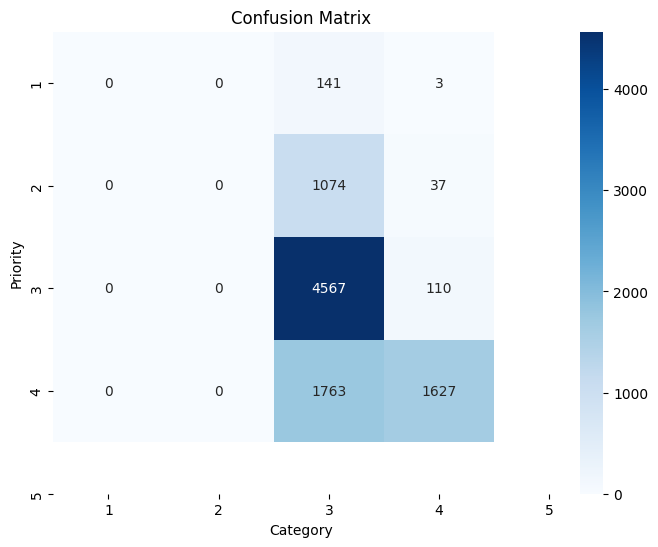

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('ITSM_data4.csv')  # Adjust the path as necessary

# Prepare your features and target
X = df[['Category']]  # Features: Category
y = df['Priority']    # Target: Priority

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Updated parameter

# Transform the 'Category' column into one-hot encoded features
X_encoded = encoder.fit_transform(X)

# Split the encoded features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
multi = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=100)

# Train the model
multi.fit(X_train, y_train)

# Make predictions on the test set
# Use X_test instead of a different dataset
y_pred = multi.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=multi.classes_, yticklabels=multi.classes_)
plt.xlabel('Category')
plt.ylabel('Priority')
plt.title('Confusion Matrix')
plt.show()

In [42]:
'''from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pre))
pd.crosstab(y_test,y_pre)'''

'from sklearn.metrics import confusion_matrix,classification_report,accuracy_score\nprint(confusion_matrix(y_test,y_pre))\npd.crosstab(y_test,y_pre)'

In [43]:
'''accu = accuracy_score(y_test,y_pre)
print(accu)'''

'accu = accuracy_score(y_test,y_pre)\nprint(accu)'

In [44]:
'''Print(classification_report(y_test,y_pre))'''

'Print(classification_report(y_test,y_pre))'

lr with cross validation  for x =catogery and y=priority

Class distribution:
 Priority
4    23382
5    16948
3     5554
2      719
1        3
Name: count, dtype: int64
Cross-validation accuracy scores for each fold: [0.66434242 0.66419912 0.66548654 0.66688124 0.65926403]
Mean cross-validation accuracy: 0.6640
Standard deviation of accuracy: 0.0026
Test Accuracy: 0.6644

Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00      1111
           4       0.61      0.98      0.75      4677
           5       0.92      0.48      0.63      3390

    accuracy                           0.66      9322
   macro avg       0.38      0.36      0.34      9322
weighted avg       0.64      0.66      0.60      9322



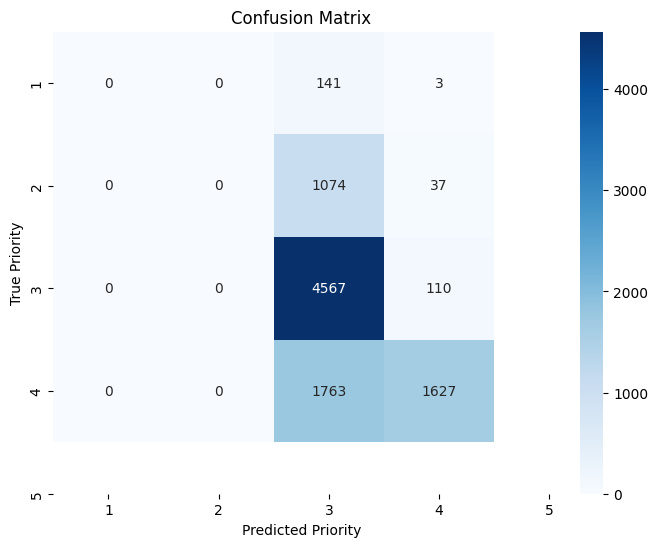

In [45]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('ITSM_data4.csv')  # Adjust the path as necessary

# Prepare your features and target
X = df[['Category']]  # Features: Category
y = df['Priority']    # Target: Priority

# Check for class distribution
class_counts = y.value_counts()
print("Class distribution:\n", class_counts)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Transform the 'Category' column into one-hot encoded features
X_encoded = encoder.fit_transform(X)

# Initialize the Logistic Regression model (remove multi_class parameter)
multi = LogisticRegression(solver='newton-cg', max_iter=100)

# Set up cross-validation with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(multi, X_encoded, y, cv=cv, scoring='accuracy')

# Output cross-validation results
print(f"Cross-validation accuracy scores for each fold: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean():.4f}")
print(f"Standard deviation of accuracy: {cv_scores.std():.4f}")

# Split into train-test sets for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Train the model on the training set
multi.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi.predict(X_test)

# Calculate accuracy on test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=multi.classes_, yticklabels=multi.classes_)
plt.xlabel('Predicted Priority')
plt.ylabel('True Priority')
plt.title('Confusion Matrix')
plt.show()


RANDOMFOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision treesmode
model = RandomForestClassifier(n_estimators = 100, random_state = 49)
# Train the model on training data
model.fit(X_train,y_train)
y_predict = model.predict(X_test)


In [47]:
confusion_matrix(y_test,y_predict)
pd.crosstab(y_test,y_predict)


col_0,4,5
Priority,,
2,141,3
3,1074,37
4,4567,110
5,1763,1627


In [48]:
acc = accuracy_score(y_test,y_predict)
print(acc)

0.6644496889079596


In [49]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00      1111
           4       0.61      0.98      0.75      4677
           5       0.92      0.48      0.63      3390

    accuracy                           0.66      9322
   macro avg       0.38      0.36      0.34      9322
weighted avg       0.64      0.66      0.60      9322



NAIVE BAYES

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pre = gnb.predict(X_test)
print("Accuracy of GNB is", accuracy_score(y_test,gnb_pre))
print("Confusion matrices \n", confusion_matrix(y_test,gnb_pre))
print("classification report\n",classification_report(y_test,gnb_pre))

Accuracy of GNB is 0.17453336193949795
Confusion matrices 
 [[   0    0    0    0    0]
 [ 141    0    0    0    3]
 [1074    0    0    0   37]
 [4567    0    0    0  110]
 [1763    0    0    0 1627]]
classification report
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00       144
           3       0.00      0.00      0.00      1111
           4       0.00      0.00      0.00      4677
           5       0.92      0.48      0.63      3390

    accuracy                           0.17      9322
   macro avg       0.18      0.10      0.13      9322
weighted avg       0.33      0.17      0.23      9322



XG BOOSTING
(GRADIENT BOOST)

In [51]:
pip install xgboost pandas scikit-learn


In [52]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


Cross Tabulation (Confusion Matrix):
Predicted    2    3     4     5   All
Actual                               
2           71   19    44    13   147
3           33  568   450    92  1143
4           40  206  4169   248  4663
5            7   72   637  2653  3369
All        151  865  5300  3006  9322


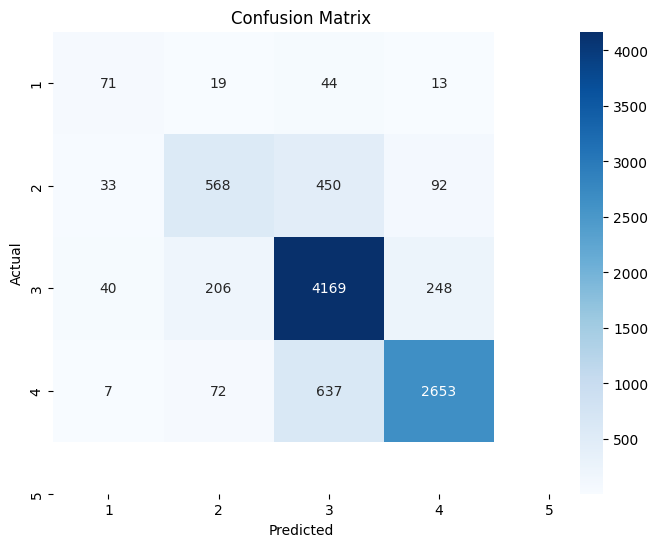

Accuracy: 0.8004

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.47      0.48      0.48       147
           3       0.66      0.50      0.57      1143
           4       0.79      0.89      0.84      4663
           5       0.88      0.79      0.83      3369

    accuracy                           0.80      9322
   macro avg       0.56      0.53      0.54      9322
weighted avg       0.80      0.80      0.80      9322



In [53]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('ITSM_data4.csv')

# Defining X (features) and y (target)
X = df[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]
y = df['Priority']

# Encode the target variable (y) to ensure labels start from 0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert data into DMatrix (for XGBoost)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Setting XGBoost parameters
params = {
    'objective': 'multi:softmax',  # multi-class classification
    'num_class': len(le.classes_),  # Number of unique priority classes
    'max_depth': 6,  # Maximum depth of the trees
    'learning_rate': 0.1,  # Learning rate
    'seed': 42  # Random seed
}

# Training the model
bst = xgb.train(params, train_data, num_boost_round=100)

# Making predictions
y_pred = bst.predict(test_data)

# Decoding y_pred to original labels for better interpretation
y_pred_decoded = le.inverse_transform(y_pred.astype(int))
y_test_decoded = le.inverse_transform(y_test.astype(int))

# Cross-tabulation (confusion matrix in a table format)
cross_tab = pd.crosstab(y_test_decoded, y_pred_decoded, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nCross Tabulation (Confusion Matrix):")
print(cross_tab)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_decoded, y_pred_decoded)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy :.4f}")

# Ensure the labels correspond to all possible classes in y
labels = sorted(df['Priority'].unique())

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_decoded, y_pred_decoded, labels=labels, target_names=[str(l) for l in labels]))



CNN


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 5, 4, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 2, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,444 (99.39 KB)

 Trainable params: 25,444 (99.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.2429 - loss: 1.3903 - val_accuracy: 0.2545 - val_loss: 1.3873
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2683 - loss: 1.3857 - val_accuracy: 0.2525 - val_loss: 1.3874
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2751 - loss: 1.3832 - val_accuracy: 0.2500 - val_loss: 1.3881
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2947 - loss: 1.3807 - val_accuracy: 0.2560 - val_loss: 1.3884
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2999 - loss: 1.3781 - val_accuracy: 0.2370 - val_loss: 1.3900
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2938 - loss: 1.3768 - val_accuracy: 0.2480 - val_loss: 1.3930
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3010 - loss: 1.3725 - val_accuracy: 0.2425 - val_loss: 1.3944
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3207 - loss: 1.3673 - val_accu

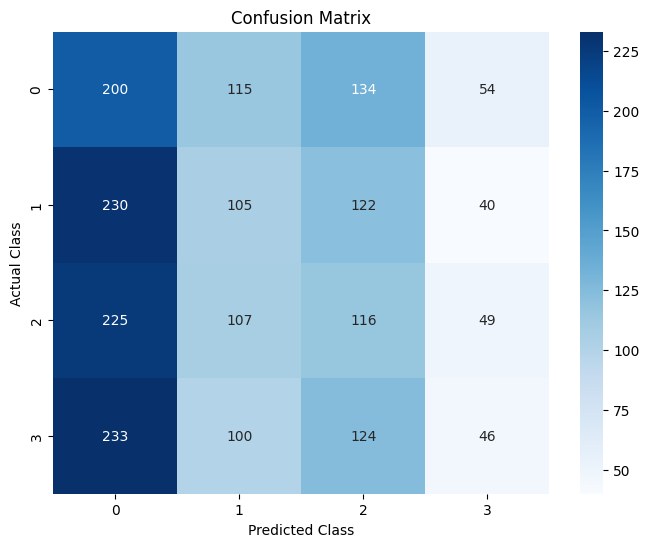


Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.40      0.29       503
           1       0.25      0.21      0.23       497
           2       0.23      0.23      0.23       497
           3       0.24      0.09      0.13       503

    accuracy                           0.23      2000
   macro avg       0.24      0.23      0.22      2000
weighted avg       0.24      0.23      0.22      2000



In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a dataset with 10,000 samples and 20 features (change based on your actual data)
np.random.seed(0)
X = np.random.rand(10000, 20)  # 20 features
y = np.random.randint(0, 4, 10000)  # 4 classes

# Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode the labels into one-hot vectors
encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))

# Reshape the input data to fit the CNN input (using a shape that is more suitable)
X_train_cnn = X_train.reshape(-1, 5, 4, 1)  # Reshape to (samples, height, width, channels)
X_test_cnn = X_test.reshape(-1, 5, 4, 1)

# Define the CNN model
model = models.Sequential()

# First convolutional layer with 32 filters and (2, 2) kernel, followed by max pooling
model.add(layers.Conv2D(32, (2, 2), activation='relu', padding='same', input_shape=(5, 4, 1)))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Second convolutional layer with 64 filters and 'same' padding
model.add(layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2), padding='same'))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Output layer with softmax activation for classification
model.add(layers.Dense(4, activation='softmax'))  # Change 4 to the number of your classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train_cnn, y_train_encoded, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test_encoded))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test_cnn, y_test_encoded)
print(f"Test Accuracy: {test_acc:.4f}")

# Make predictions
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode the predicted classes and true labels
y_true = encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))


COMBINING ALL THE CLASSIFICATIONS



Accuracy: 0.9437

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.95      0.98      0.97      7550
           3       0.90      0.79      0.84      1769

    accuracy                           0.94      9321
   macro avg       0.95      0.92      0.94      9321
weighted avg       0.94      0.94      0.94      9321



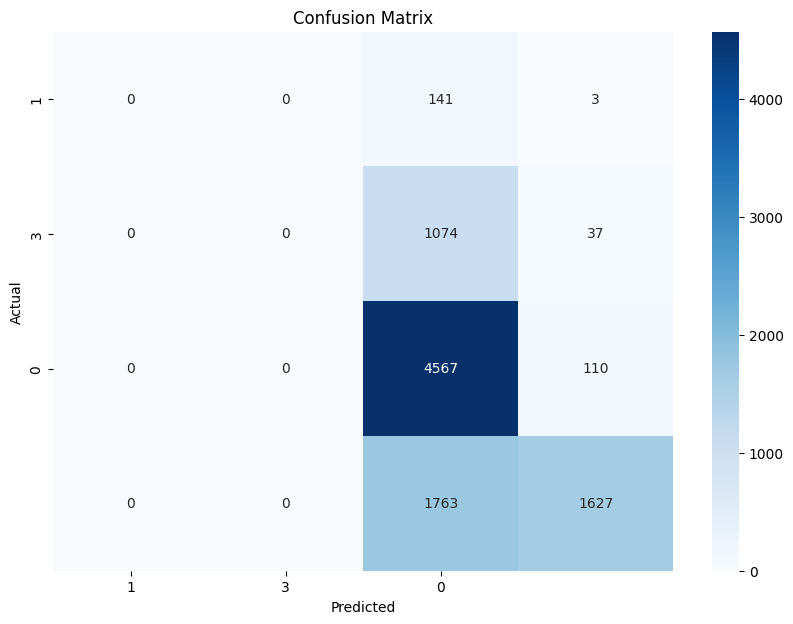


Cross Tabulation:
 Predicted  0     1     3   All
Actual                        
0          2     0     0     2
1          0  7396   154  7550
3          0   371  1398  1769
All        2  7767  1552  9321


In [55]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('ITSM_data4.csv')

# Fill missing values
df = df.copy()
df["CI_Cat"] = df["CI_Cat"].fillna("No Cat")
df["CI_Subcat"] = df["CI_Subcat"].fillna("No Subcat")
df["Impact"] = df["Impact"].replace('NS', 0)
df["Impact"] = pd.to_numeric(df["Impact"], errors='coerce').ffill()
df["Priority"] = df["Priority"].ffill()
df["No_of_Related_Incidents"] = df["No_of_Related_Incidents"].fillna(0)

# Drop unnecessary columns
columns_to_drop = ['Incident_ID']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Convert object columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Fill remaining missing values with 0
df = df.fillna(0)

# Define features and target
X = df.drop(columns=['Category'])
y = df['Category']

# Filter out classes with very few samples
min_samples = 5
class_counts = y.value_counts()
classes_to_keep = class_counts[class_counts >= min_samples].index
df_filtered = df[df['Category'].isin(classes_to_keep)]
X = df_filtered.drop(columns=['Category'])
y = df_filtered['Category']

# Handle case where there's still only one class
if len(y.value_counts()) < 2:
    raise ValueError("The dataset contains only one class, not suitable for classification.")

# Split the data into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define individual classifiers
logreg = LogisticRegression(solver='newton-cg', max_iter=100)
rf = RandomForestClassifier(n_estimators=100, random_state=49)
gnb = GaussianNB()
xgb_clf = XGBClassifier(eval_metric='mlogloss')

# Combine classifiers in a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('logreg', logreg),
    ('rf', rf),
    ('gnb', gnb),
    ('xgb', xgb_clf)
], voting='hard')

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=classes_to_keep, yticklabels=classes_to_keep)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross Tabulation
cross_tab = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nCross Tabulation:\n", cross_tab)


CLUSTERS (K-MEANS,DB-SCAN,GMM)

K-MEANS

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('ITSM_data2.csv')

# Extracting relevant features (as used in your Random Forest code)
df['Incident_Digits'] = df['Incident_ID'].str.extract('(\d+)').astype(float)

# Filling missing values in 'No_of_Related_Incidents' and 'Category'
df['No_of_Related_Incidents'].fillna(0, inplace=True)
df['Category'].fillna('Unknown', inplace=True)

# Label Encoding for categorical variables
le_category = LabelEncoder()
le_ci_name = LabelEncoder()

df['Category'] = le_category.fit_transform(df['Category'])
df['CI_Name'] = le_ci_name.fit_transform(df['CI_Name'])

# Selecting features for clustering
X = df[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering with 5 clusters (you can adjust the number of clusters as needed)
kmeans = KMeans(n_clusters=100, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Checking the clusters assigned
print(df[['Incident_ID', 'Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name', 'Cluster']].head())

# Optionally, you can also check the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

  Incident_ID  Category  Incident_Digits  No_of_Related_Incidents  CI_Name  \
0   IM0000004         1              4.0                      2.0     2741   
1   IM0000005         1              5.0                      1.0     2863   
2   IM0000006         3              6.0                      0.0      990   
3   IM0000011         1             11.0                      0.0     2863   
4   IM0000012         1             12.0                      0.0     2863   

   Cluster  
0       48  
1       30  
2       21  
3       49  
4       49  
Cluster Centers:
 [[-4.83574727e-01 -7.90987318e-01 -7.26140084e-02  5.13535299e-02]
 [ 2.06562601e+00  1.39000612e+00 -7.26140084e-02  6.55321997e-01]
 [-4.83574727e-01  1.28585936e+00 -7.26140084e-02  3.18958419e-01]
 [-4.83574727e-01 -5.78074439e-01 -7.26140084e-02 -2.80337172e+00]
 [-4.83574727e-01 -2.84092409e-01  4.04056521e+01 -9.95205500e-02]
 [ 2.06562601e+00  2.21878725e-01 -7.26140084e-02  2.52982397e-01]
 [-4.83574727e-01  1.26328848e+00

In [57]:
from sklearn.metrics import silhouette_score

# Apply K-means clustering (as done before)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Evaluate K-means performance using inertia
inertia = kmeans.inertia_
print(f"Inertia (Sum of squared distances to nearest cluster center): {inertia}")

# Evaluate using silhouette score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Inertia (Sum of squared distances to nearest cluster center): 77868.35120037821
Silhouette Score: 0.39518331233420545


k means code with ss and dbi

In [58]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
df = pd.read_csv('ITSM_data4.csv')

# Extracting relevant features (as used in your Random Forest code)
df['Incident_Digits'] = df['Incident_ID'].str.extract('(\d+)').astype(float)

# Filling missing values in 'No_of_Related_Incidents' and 'Category'
df['No_of_Related_Incidents'].fillna(0, inplace=True)
df['Category'].fillna('Unknown', inplace=True)

# Label Encoding for categorical variables
le_category = LabelEncoder()
le_ci_name = LabelEncoder()

df['Category'] = le_category.fit_transform(df['Category'])
df['CI_Name'] = le_ci_name.fit_transform(df['CI_Name'])

# Selecting features for clustering
X = df[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying K-means clustering with 100 clusters (adjust as needed)
kmeans = KMeans(n_clusters=100, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Checking the clusters assigned
print(df[['Incident_ID', 'Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name', 'Cluster']].head())

# Optionally, you can also check the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Evaluate K-means performance using inertia
inertia = kmeans.inertia_
print(f"Inertia (Sum of squared distances to nearest cluster center): {inertia}")

# Evaluate using silhouette score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


  Incident_ID  Category  Incident_Digits  No_of_Related_Incidents  CI_Name  \
0   IM0000004         1              4.0                        2     2741   
1   IM0000005         1              5.0                        1     2863   
2   IM0000006         3              6.0                        0      990   
3   IM0000011         1             11.0                        0     2863   
4   IM0000012         1             12.0                        0     2863   

   Cluster  
0       48  
1       30  
2       21  
3       49  
4       49  
Cluster Centers:
 [[-4.83574727e-01 -7.90987318e-01 -7.26140084e-02  5.13535299e-02]
 [ 2.06562601e+00  1.39000612e+00 -7.26140084e-02  6.55321997e-01]
 [-4.83574727e-01  1.28585936e+00 -7.26140084e-02  3.18958419e-01]
 [-4.83574727e-01 -5.78074439e-01 -7.26140084e-02 -2.80337172e+00]
 [-4.83574727e-01 -2.84092409e-01  4.04056521e+01 -9.95205500e-02]
 [ 2.06562601e+00  2.21878725e-01 -7.26140084e-02  2.52982397e-01]
 [-4.83574727e-01  1.26328848e+00

GMM-gausion


In [59]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset (assuming a CSV file format)
df = pd.read_csv('ITSM_data4.csv')

# Dropping the specified columns by index
#df.drop(df.columns[[3,5,10,11,12,13,14,15,16,17,18,19,20,22,23]], axis=1, inplace=True)

# Feature engineering (as done before)
df['Incident_Digits'] = df['Incident_ID'].str.extract('(\d+)').astype(float)

# Filling missing values in 'No_of_Related_Incidents' and 'Category'
df['No_of_Related_Incidents'].fillna(0, inplace=True)
df['Category'].fillna('Unknown', inplace=True)

# Label Encoding for categorical variables
le_category = LabelEncoder()
le_ci_name = LabelEncoder()

df['Category'] = le_category.fit_transform(df['Category'])
df['CI_Name'] = le_ci_name.fit_transform(df['CI_Name'])

# Selecting features for clustering
X = df[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=5, random_state=42)  # n_components is the number of clusters
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Checking the clusters assigned
print(df[['Incident_ID', 'Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name', 'GMM_Cluster']].head())

# Optional: Check GMM cluster centers (means of the Gaussian components)
print("GMM means (Cluster Centers):\n", gmm.means_)


  Incident_ID  Category  Incident_Digits  No_of_Related_Incidents  CI_Name  \
0   IM0000004         1              4.0                        2     2741   
1   IM0000005         1              5.0                        1     2863   
2   IM0000006         3              6.0                        0      990   
3   IM0000011         1             11.0                        0     2863   
4   IM0000012         1             12.0                        0     2863   

   GMM_Cluster  
0            4  
1            4  
2            2  
3            3  
4            3  
GMM means (Cluster Centers):
 [[-1.54528905 -0.08824235 -0.07261401 -0.85743663]
 [ 2.06562601  0.14277888  1.8939955   0.31876915]
 [ 2.06562601 -0.11395648 -0.07261401  0.14834962]
 [-0.48357473  0.01943977 -0.07261401 -0.03462263]
 [-0.48357473  0.24278234  2.74513971 -0.04070171]]


In [60]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset (assuming a CSV file format)
df = pd.read_csv('ITSM_data4.csv')

# Feature engineering (as done before)
df['Incident_Digits'] = df['Incident_ID'].str.extract('(\d+)').astype(float)

# Filling missing values in 'No_of_Related_Incidents' and 'Category'
df['No_of_Related_Incidents'] = df['No_of_Related_Incidents'].fillna(0)  # Reassign
df['Category'] = df['Category'].fillna('Unknown')  # Reassign

# Label Encoding for categorical variables
le_category = LabelEncoder()
le_ci_name = LabelEncoder()

df['Category'] = le_category.fit_transform(df['Category'])
df['CI_Name'] = le_ci_name.fit_transform(df['CI_Name'])

# Selecting features for clustering
X = df[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]

# Normalizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=5, random_state=42)  # n_components is the number of clusters
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Checking the clusters assigned
print(df[['Incident_ID', 'Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name', 'GMM_Cluster']].head())

# Optional: Check GMM cluster centers (means of the Gaussian components)
print("GMM means (Cluster Centers):\n", gmm.means_)

# Evaluate GMM performance using silhouette score
silhouette_avg = silhouette_score(X_scaled, df['GMM_Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate using Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, df['GMM_Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


  Incident_ID  Category  Incident_Digits  No_of_Related_Incidents  CI_Name  \
0   IM0000004         1              4.0                        2     2741   
1   IM0000005         1              5.0                        1     2863   
2   IM0000006         3              6.0                        0      990   
3   IM0000011         1             11.0                        0     2863   
4   IM0000012         1             12.0                        0     2863   

   GMM_Cluster  
0            4  
1            4  
2            2  
3            3  
4            3  
GMM means (Cluster Centers):
 [[-1.54528905 -0.08824235 -0.07261401 -0.85743663]
 [ 2.06562601  0.14277888  1.8939955   0.31876915]
 [ 2.06562601 -0.11395648 -0.07261401  0.14834962]
 [-0.48357473  0.01943977 -0.07261401 -0.03462263]
 [-0.48357473  0.24278234  2.74513971 -0.04070171]]
Silhouette Score: 0.2781968365086732
Davies-Bouldin Index: 1.5960150361255152


DB-SCAN


In [61]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the dataset
df = pd.read_csv('ITSM_data4.csv')

# Extracting relevant features
df['Incident_Digits'] = df['Incident_ID'].str.extract('(\d+)').astype(float)

# Filling missing values
df['No_of_Related_Incidents'] = df['No_of_Related_Incidents'].fillna(0)
df['Category'] = df['Category'].fillna('Unknown')

# Dropping unnecessary columns based on your previous code
#df.drop(df.columns[[3, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23]], axis=1, inplace=True)

# Label Encoding for categorical variables
le_category = LabelEncoder()
le_ci_name = LabelEncoder()

df['Category'] = le_category.fit_transform(df['Category'])
df['CI_Name'] = le_ci_name.fit_transform(df['CI_Name'])

# Selecting features for clustering
X = df[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]

# Normalize the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying DBSCAN with specific parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' based on your data
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Checking the clusters assigned
print(df[['Incident_ID', 'Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name', 'DBSCAN_Cluster']].head())

# Analyzing the number of clusters and noise points
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Calculate Silhouette Score and Davies-Bouldin Index
if n_clusters > 1:  # Silhouette score is only defined if there is more than one cluster
    # Filter out noise points (-1)
    valid_labels = dbscan.labels_[dbscan.labels_ != -1]
    valid_X_scaled = X_scaled[dbscan.labels_ != -1]

    silhouette_avg = silhouette_score(valid_X_scaled, valid_labels)
    db_index = davies_bouldin_score(valid_X_scaled, valid_labels)

    print(f'Silhouette Score: {silhouette_avg}')
    print(f'Davies-Bouldin Index: {db_index}')
else:
    print('Silhouette Score and Davies-Bouldin Index cannot be calculated with less than 2 clusters.')


  Incident_ID  Category  Incident_Digits  No_of_Related_Incidents  CI_Name  \
0   IM0000004         1              4.0                        2     2741   
1   IM0000005         1              5.0                        1     2863   
2   IM0000006         3              6.0                        0      990   
3   IM0000011         1             11.0                        0     2863   
4   IM0000012         1             12.0                        0     2863   

   DBSCAN_Cluster  
0               0  
1               1  
2               2  
3               3  
4               3  
Number of clusters: 9
Number of noise points: 109
Silhouette Score: 0.24236399508937453
Davies-Bouldin Index: 0.9632989336983466


AGGLOMERATIVE HIERARCHICAL CLUSTERING

In [62]:
pip install numpy pandas matplotlib scikit-learn


Agglomerative Clustering Silhouette Score: 0.402851
Agglomerative Clustering Davies-Bouldin Index: 0.793642


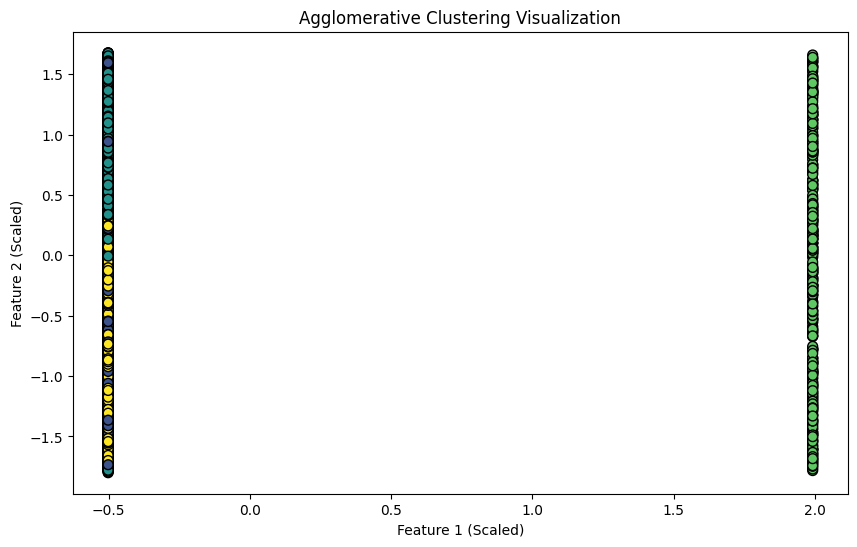

In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('ITSM_data4.csv')

# Drop unnecessary columns if any
# df = df[['Incident_ID', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name', 'Category']]

# Sample a smaller portion of the data for clustering
df_sampled = df.sample(frac=0.05, random_state=42)  # Use 5% of the data

# Data preprocessing
df_sampled['Incident_Digits'] = df_sampled['Incident_ID'].str.extract('(\d+)').astype(float)
df_sampled['No_of_Related_Incidents'].fillna(0, inplace=True)
df_sampled['Category'].fillna('Unknown', inplace=True)

# Label Encoding for categorical variables
df_sampled['Category'] = df_sampled['Category'].astype('category').cat.codes
df_sampled['CI_Name'] = df_sampled['CI_Name'].astype('category').cat.codes

# Selecting features for clustering
X = df_sampled[['Category', 'Incident_Digits', 'No_of_Related_Incidents', 'CI_Name']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Agglomerative Hierarchical Clustering
n_clusters = 5
agglo = AgglomerativeClustering(n_clusters=n_clusters)
df_sampled['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Evaluate the clustering
agglo_silhouette = silhouette_score(X_scaled, df_sampled['Agglo_Cluster'])
agglo_db_index = davies_bouldin_score(X_scaled, df_sampled['Agglo_Cluster'])

print(f"Agglomerative Clustering Silhouette Score: {agglo_silhouette:.6f}")
print(f"Agglomerative Clustering Davies-Bouldin Index: {agglo_db_index:.6f}")

# Optional: Visualize the clusters if dimensionality allows
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df_sampled['Agglo_Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.show()


COMBINING CLUSTERS

KMeans - Silhouette Score: 0.6569, Davies-Bouldin Index: 0.4614
GMM - Silhouette Score: 0.6569, Davies-Bouldin Index: 0.4614
DBSCAN - Silhouette Score: -1.0000, Davies-Bouldin Index: inf
Agglomerative - Silhouette Score: 0.6566, Davies-Bouldin Index: 0.4599
Combined - Silhouette Score: 0.2679, Davies-Bouldin Index: 4.0456


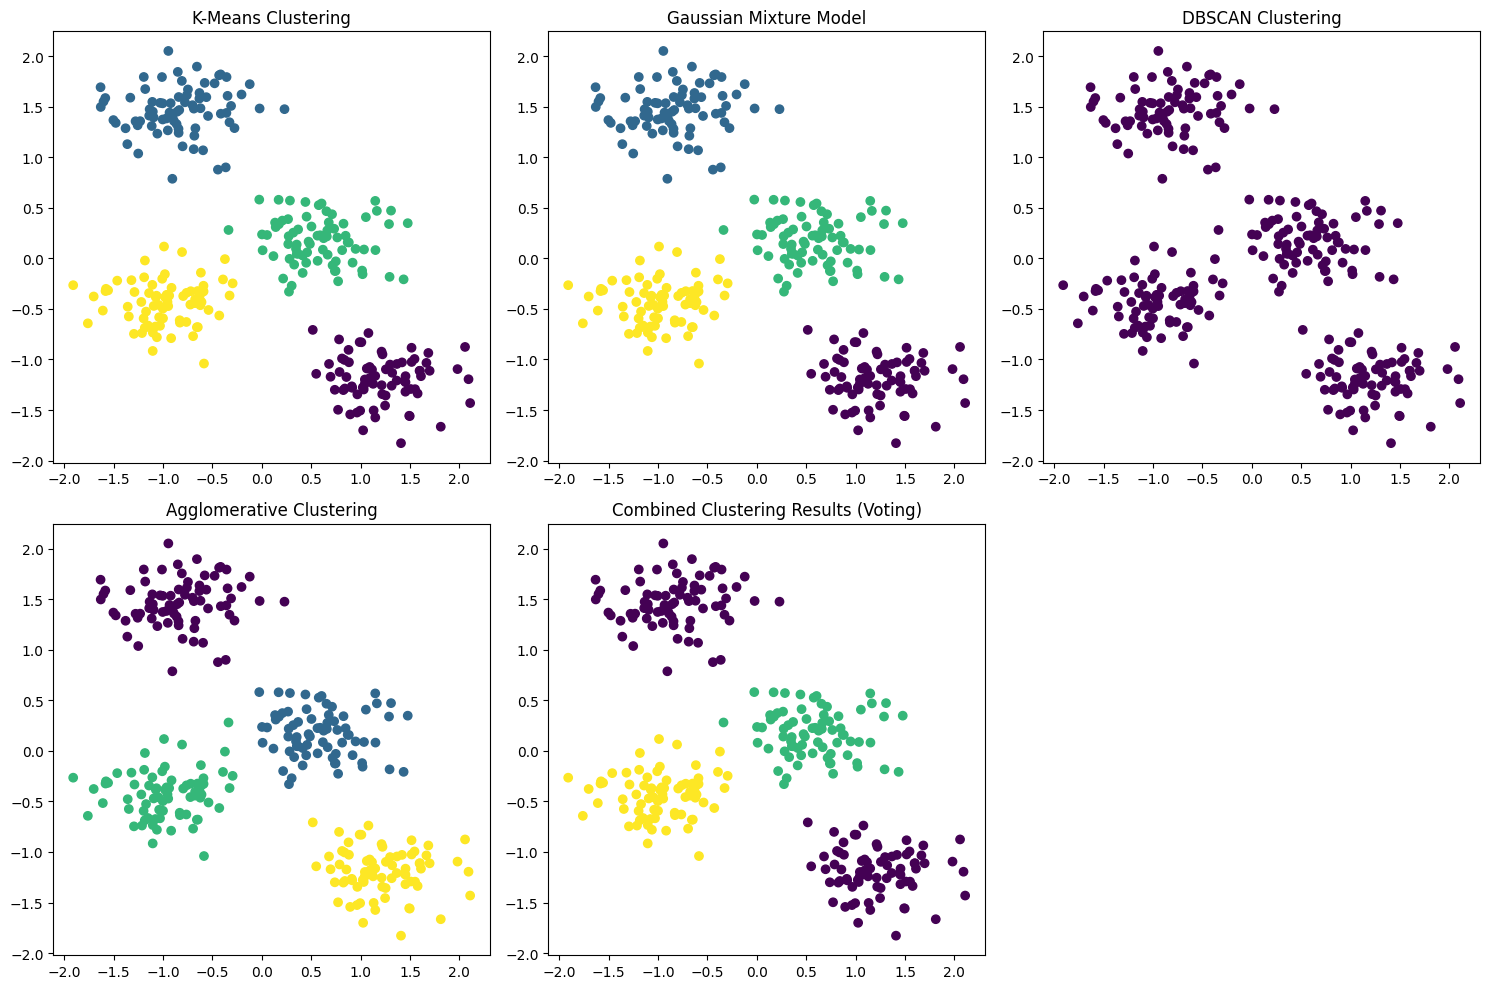

In [64]:
# Install necessary libraries (if needed)
!pip install numpy pandas scikit-learn matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Create a sample dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Standardize the data

# Step 2: Perform Clustering
# K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
labels_kmeans = kmeans.fit_predict(X)

# GMM
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(X)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(X)

# Step 3: Combine Cluster Results using Majority Voting
# Create a DataFrame for labels
results_df = pd.DataFrame({
    'KMeans': labels_kmeans,
    'GMM': labels_gmm,
    'DBSCAN': labels_dbscan,
    'Agglomerative': labels_agglo
})

# Replace -1 (outliers from DBSCAN) with NaN for voting
results_df.replace(-1, np.nan, inplace=True)

# Majority Voting
combined_labels = results_df.mode(axis=1)[0].fillna(-1).astype(int)  # Fill NaN with -1 for DBSCAN outliers

# Step 4: Calculate Silhouette Score and Davies-Bouldin Index
def calculate_metrics(labels):
    if len(set(labels)) > 1 and -1 not in labels:  # Check for at least 2 clusters
        silhouette = silhouette_score(X, labels)
        dbi = davies_bouldin_score(X, labels)
    else:
        silhouette = -1  # Not defined
        dbi = np.inf  # Not defined
    return silhouette, dbi

metrics = {
    'KMeans': calculate_metrics(labels_kmeans),
    'GMM': calculate_metrics(labels_gmm),
    'DBSCAN': calculate_metrics(labels_dbscan),
    'Agglomerative': calculate_metrics(labels_agglo),
    'Combined': calculate_metrics(combined_labels)
}

# Print Metrics
for method, (silhouette, dbi) in metrics.items():
    print(f"{method} - Silhouette Score: {silhouette:.4f}, Davies-Bouldin Index: {dbi:.4f}")

# Step 5: Visualize the Clustering Results
plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.title("K-Means Clustering")
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='viridis')

plt.subplot(232)
plt.title("Gaussian Mixture Model")
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis')

plt.subplot(233)
plt.title("DBSCAN Clustering")
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis')

plt.subplot(234)
plt.title("Agglomerative Clustering")
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='viridis')

plt.subplot(235)
plt.title("Combined Clustering Results (Voting)")
plt.scatter(X[:, 0], X[:, 1], c=combined_labels, cmap='viridis')

plt.tight_layout()
plt.show()


Clustering Performance Metrics Comparison:
GMM:
  Silhouette Score: 0.6569
  Davies-Bouldin Index: 0.4614
Agglomerative:
  Silhouette Score: 0.6566
  Davies-Bouldin Index: 0.4599
Combined:
  Silhouette Score: 0.2667
  Davies-Bouldin Index: 3.9360


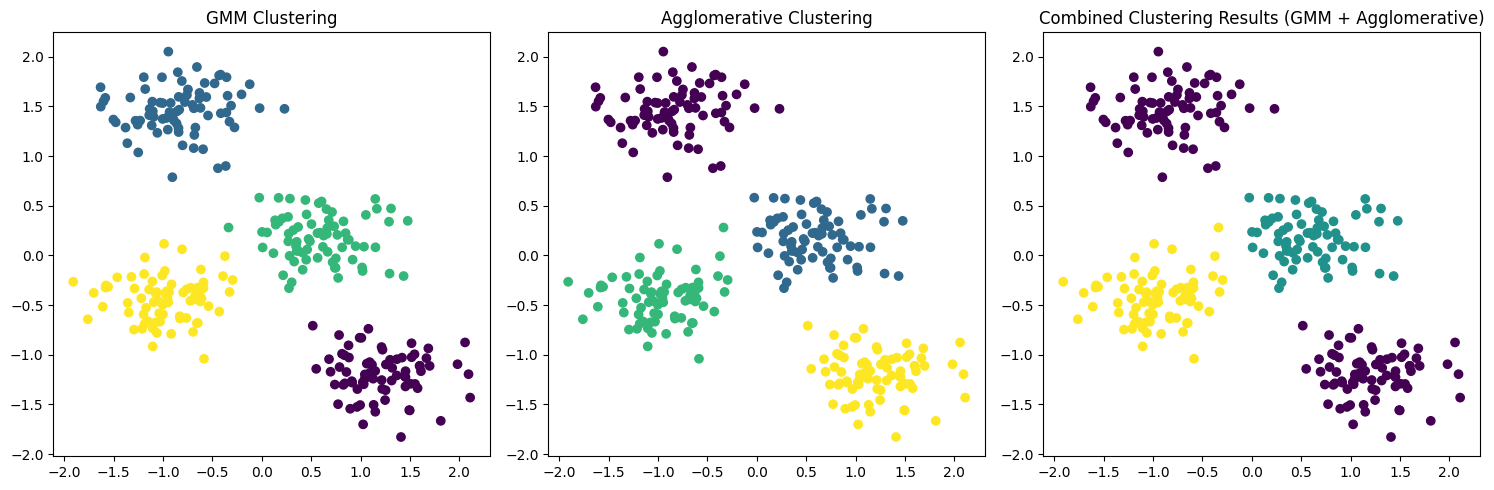

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Create a sample dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Standardize the data

# Step 2: Perform Clustering
# GMM
gmm = GaussianMixture(n_components=4, random_state=42)
labels_gmm = gmm.fit_predict(X)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
labels_agglo = agglo.fit_predict(X)

# Step 3: Combine Cluster Results using Majority Voting (Only GMM and Agglomerative)
results_df = pd.DataFrame({
    'GMM': labels_gmm,
    'Agglomerative': labels_agglo
})

# Majority Voting
combined_labels = results_df.mode(axis=1)[0].astype(int)

# Step 4: Evaluate the Combined Clustering
silhouette_gmm = silhouette_score(X, labels_gmm)
silhouette_agglo = silhouette_score(X, labels_agglo)
silhouette_combined = silhouette_score(X, combined_labels)

db_index_gmm = davies_bouldin_score(X, labels_gmm)
db_index_agglo = davies_bouldin_score(X, labels_agglo)
db_index_combined = davies_bouldin_score(X, combined_labels)

# Display Clustering Performance Metrics
print("Clustering Performance Metrics Comparison:")
print(f"GMM:\n  Silhouette Score: {silhouette_gmm:.4f}\n  Davies-Bouldin Index: {db_index_gmm:.4f}")
print(f"Agglomerative:\n  Silhouette Score: {silhouette_agglo:.4f}\n  Davies-Bouldin Index: {db_index_agglo:.4f}")
print(f"Combined:\n  Silhouette Score: {silhouette_combined:.4f}\n  Davies-Bouldin Index: {db_index_combined:.4f}")

# Step 5: Visualize the Clustering Results
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title("GMM Clustering")
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='viridis')

plt.subplot(132)
plt.title("Agglomerative Clustering")
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='viridis')

plt.subplot(133)
plt.title("Combined Clustering Results (GMM + Agglomerative)")
plt.scatter(X[:, 0], X[:, 1], c=combined_labels, cmap='viridis')

plt.tight_layout()
plt.show()


Combined GMM + DBSCAN Results:
Silhouette Score: 0.6569234398199433
Davies-Bouldin Index: 0.46137036230952966


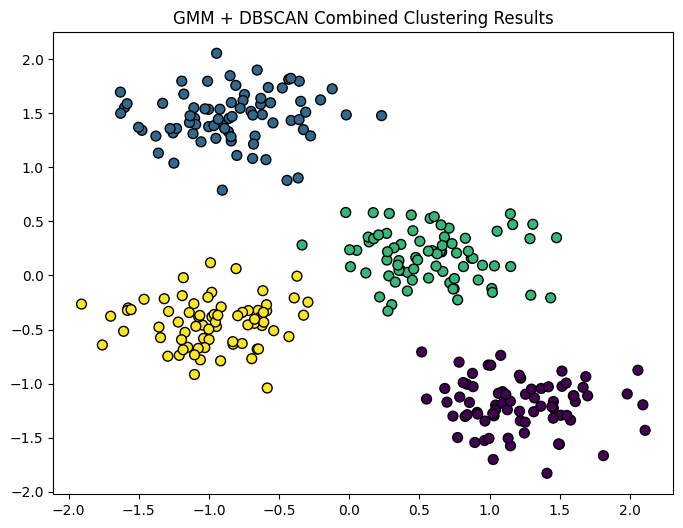

In [66]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load your dataset (example)
# Assume 'df' is your dataset and 'X' contains the features for clustering
# Here, we use a synthetic dataset for demonstration purposes
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = StandardScaler().fit_transform(X)  # Standardize the data

# Step 1: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Identify non-noise points (where DBSCAN label is not -1)
non_noise_indices = dbscan_labels != -1
non_noise_data = X[non_noise_indices]

# Step 2: Apply GMM on non-noise points
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(non_noise_data)

# Step 3: Combine DBSCAN and GMM results
# For non-noise points, use GMM labels, and retain DBSCAN's noise label (-1) for noise points
combined_labels = np.full_like(dbscan_labels, -1)  # Initialize with DBSCAN's labels (noise as -1)
combined_labels[non_noise_indices] = gmm_labels  # Replace non-noise points with GMM's labels

# Step 4: Evaluate the clustering performance
if len(set(combined_labels)) > 1:  # Ensure more than one cluster exists
    silhouette_combined = silhouette_score(X, combined_labels)
    db_index_combined = davies_bouldin_score(X, combined_labels)
else:
    silhouette_combined = "N/A"
    db_index_combined = "N/A"

print(f"Combined GMM + DBSCAN Results:")
print(f"Silhouette Score: {silhouette_combined}")
print(f"Davies-Bouldin Index: {db_index_combined}")

# Step 5: Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.title("GMM + DBSCAN Combined Clustering Results")
plt.scatter(X[:, 0], X[:, 1], c=combined_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.show()


K-Means Silhouette Score: 0.65692344, DBI: 0.46137036
Agglomerative Silhouette Score: 0.65655915, DBI: 0.45993735
Combined Silhouette Score (K-Means + Agglomerative): 0.52327548, Davies-Bouldin Index: 0.72940567


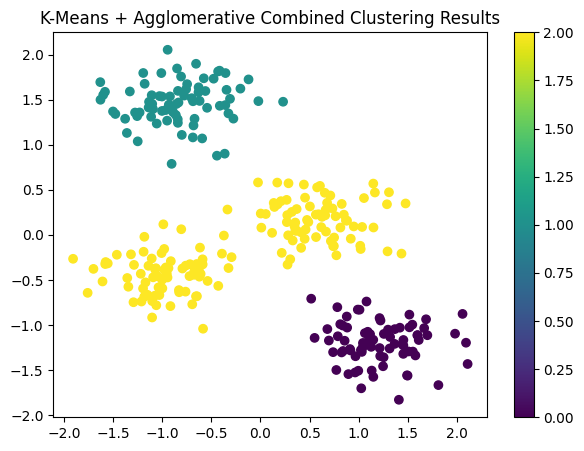

In [67]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Create a sample dataset
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)  # This will create the variable X

# Step 1: Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 3: Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(X_scaled)

# Step 4: Calculate Silhouette Scores
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
agglo_silhouette = silhouette_score(X_scaled, agglo_labels)

# Calculate Davies-Bouldin Index
kmeans_dbi = davies_bouldin_score(X_scaled, kmeans_labels)
agglo_dbi = davies_bouldin_score(X_scaled, agglo_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.8f}, DBI: {kmeans_dbi:.8f}")
print(f"Agglomerative Silhouette Score: {agglo_silhouette:.8f}, DBI: {agglo_dbi:.8f}")

# Step 5: Combine Clustering Results
# Create an empty array for combined labels
combined_labels = np.zeros_like(kmeans_labels)

# Assign labels based on majority voting
for i in range(len(X_scaled)):
    # Count the occurrences of each label
    kmeans_label = kmeans_labels[i]
    agglo_label = agglo_labels[i]

    # Assign the label that occurs more frequently
    combined_labels[i] = kmeans_label if (np.sum(kmeans_labels == kmeans_label) >= np.sum(agglo_labels == agglo_label)) else agglo_label

# Step 6: Evaluate Combined Results
combined_silhouette_score = silhouette_score(X_scaled, combined_labels)
combined_dbi = davies_bouldin_score(X_scaled, combined_labels)

print(f"Combined Silhouette Score (K-Means + Agglomerative): {combined_silhouette_score:.8f}, Davies-Bouldin Index: {combined_dbi:.8f}")

# Step 7: Visualize the Combined Results
plt.figure(figsize=(7, 5))
plt.title("K-Means + Agglomerative Combined Clustering Results")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=combined_labels, cmap='viridis')
plt.colorbar()
plt.show()


In [68]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Assuming you already have your dataset loaded in a variable called `X`
# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(X_scaled)

# Step 3: Apply GMM
gmm = GaussianMixture(n_components=4, random_state=42)  # Adjust n_components as needed
gmm_labels = gmm.fit_predict(X_scaled)

# Step 4: Combine the labels
# Create an array to hold the combined labels
combined_labels = np.zeros_like(kmeans_labels)

# For each data point, assign the label from K-Means or GMM based on majority voting
for i in range(len(X_scaled)):
    # Get the labels from both clustering methods
    labels = np.array([kmeans_labels[i], gmm_labels[i]])

    # Use majority voting to determine the combined label
    combined_labels[i] = np.bincount(labels).argmax()

# Step 5: Calculate the combined silhouette score and DBI
combined_silhouette_score = silhouette_score(X_scaled, combined_labels)
kmeans_dbi = davies_bouldin_score(X_scaled, kmeans_labels)
gmm_dbi = davies_bouldin_score(X_scaled, gmm_labels)
combined_dbi = davies_bouldin_score(X_scaled, combined_labels)

# Print results
print(f"K-Means Silhouette Score: {silhouette_score(X_scaled, kmeans_labels):.8f}, DBI: {kmeans_dbi:.8f}")
print(f"GMM Silhouette Score: {silhouette_score(X_scaled, gmm_labels):.8f}, DBI: {gmm_dbi:.8f}")
print(f"Combined Silhouette Score (K-Means + GMM): {combined_silhouette_score:.8f}, DBI: {combined_dbi:.8f}")


K-Means Silhouette Score: 0.65692344, DBI: 0.46137036
GMM Silhouette Score: 0.65692344, DBI: 0.46137036
Combined Silhouette Score (K-Means + GMM): 0.65692344, DBI: 0.46137036


COMBINED CLUSTERS(KMEANS,DBSCAN,GMM)

In [69]:
import pandas as pd

# Load the dataset (assuming you've already done this)
df = pd.read_csv('updated_dataframe.csv')

# Print the existing columns
print("Columns in DataFrame:")
print(df.columns.tolist())


Columns in DataFrame:
['CI_Name', 'CI_Cat', 'CI_Subcat', 'Incident_ID', 'Impact', 'Urgency', 'Priority', 'Category', 'No_of_Related_Incidents']


In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
# Create a new DataFrame for the cluster labels using the correct index
cluster_labels_df = pd.DataFrame({'Cluster': kmeans.fit_predict(X_scaled)}, index=range(X_scaled.shape[0]))

# If you need to add it to the original 'df', consider merging or concatenating
# based on how 'X_scaled' relates to 'df'
# Example using concatenation if 'X_scaled' represents the first 100 rows of 'df':
df = pd.concat([df.iloc[:X_scaled.shape[0]].reset_index(drop=True), cluster_labels_df], axis=1)

# If 'X_scaled' corresponds to specific rows in 'df' based on some condition:
# df_subset = df[condition]
# df_subset = pd.concat([df_subset.reset_index(drop=True), cluster_labels_df], axis=1)
# df.update(df_subset) # Update 'df' with the clustered subset

# Print the updated DataFrame (optional)
print(df.head())

     CI_Name          CI_Cat              CI_Subcat Incident_ID Impact  \
0  SUB000508  subapplication  Web Based Application   IM0000004      4   
1  WBA000124     application  Web Based Application   IM0000005      3   
2  DTA000024     application    Desktop Application   IM0000006     NS   
3  WBA000124     application  Web Based Application   IM0000011      4   
4  WBA000124     application  Web Based Application   IM0000012      4   

  Urgency  Priority                 Category  No_of_Related_Incidents  Cluster  
0       4       4.0                 incident                      2.0        0  
1       3       3.0                 incident                      1.0        1  
2       3       NaN  request for information                      NaN        2  
3       4       4.0                 incident                      NaN        1  
4       4       4.0                 incident                      NaN        0  


In [71]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)  # Save the results to the DataFrame


In [72]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)  # Save the results to the DataFrame


In [73]:
import numpy as np

# Check the existing columns
print("Columns in DataFrame:")
print(df.columns.tolist())

# Replace these with the actual names you find
kmeans_column = 'Cluster'  # Update this to the actual K-means cluster column name
gmm_column = 'GMM_Cluster'  # Update this to the actual GMM cluster column name
dbscan_column = 'DBSCAN_Cluster'  # Update this to the actual DBSCAN cluster column name

# Prepare the DataFrame for combining cluster results
# Ensure these column names match your DataFrame
combined_clusters = df[[kmeans_column, gmm_column, dbscan_column]].copy()

# Handle DBSCAN's noise points (-1)
combined_clusters[dbscan_column] = combined_clusters[dbscan_column].replace(-1, np.nan)

# Combine the clustering results using majority voting
combined_clusters['Final_Cluster'] = combined_clusters.mode(axis=1)[0]

# Assign the final cluster labels back to the original DataFrame
df['Final_Cluster'] = combined_clusters['Final_Cluster']

# Check the results
print(df[[kmeans_column, gmm_column, dbscan_column, 'Final_Cluster']].head())

# Optional: Analyze the number of unique clusters in the final result
n_final_clusters = len(np.unique(df['Final_Cluster']))
print(f'Number of final clusters: {n_final_clusters}')


Columns in DataFrame:
['CI_Name', 'CI_Cat', 'CI_Subcat', 'Incident_ID', 'Impact', 'Urgency', 'Priority', 'Category', 'No_of_Related_Incidents', 'Cluster', 'GMM_Cluster', 'DBSCAN_Cluster']
   Cluster  GMM_Cluster  DBSCAN_Cluster  Final_Cluster
0        0            0               0              0
1        1            1               0              1
2        2            2               0              2
3        1            1               0              1
4        0            0               0              0
Number of final clusters: 5


PERFORMANCE AFTER COMBINING RESULTS

In [74]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Extracting predicted labels for individual algorithms and the ensemble
kmeans_labels = df['Cluster']
gmm_labels = df['GMM_Cluster']
dbscan_labels = df['DBSCAN_Cluster']
ensemble_labels = df['Final_Cluster']

# Performance Evaluation for K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db_index = davies_bouldin_score(X_scaled, kmeans_labels)

# Performance Evaluation for GMM
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_db_index = davies_bouldin_score(X_scaled, gmm_labels)

# Performance Evaluation for DBSCAN
# Exclude noise points (-1) for DBSCAN
dbscan_core_samples = dbscan_labels[dbscan_labels != -1]
if len(np.unique(dbscan_core_samples)) > 1:
    dbscan_silhouette = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_core_samples)
    dbscan_db_index = davies_bouldin_score(X_scaled[dbscan_labels != -1], dbscan_core_samples)
else:
    dbscan_silhouette = -1  # Set to -1 or any other default to indicate insufficient clusters
    dbscan_db_index = -1

# Performance Evaluation for Ensemble
ensemble_silhouette = silhouette_score(X_scaled, ensemble_labels)
ensemble_db_index = davies_bouldin_score(X_scaled, ensemble_labels)

# Print Results
print("K-Means Performance Metrics:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}, Davies-Bouldin Index: {kmeans_db_index:.4f}\n")

print("GMM Performance Metrics:")
print(f"Silhouette Score: {gmm_silhouette:.4f}, Davies-Bouldin Index: {gmm_db_index:.4f}\n")

print("DBSCAN Performance Metrics:")
print(f"Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}\n")

print("Ensemble Performance Metrics:")
print(f"Silhouette Score: {ensemble_silhouette:.4f}, Davies-Bouldin Index: {ensemble_db_index:.4f}\n")


K-Means Performance Metrics:
Silhouette Score: 0.5935, Davies-Bouldin Index: 0.6131

GMM Performance Metrics:
Silhouette Score: 0.5920, Davies-Bouldin Index: 0.6148

DBSCAN Performance Metrics:
Silhouette Score: -1.0000, Davies-Bouldin Index: -1.0000

Ensemble Performance Metrics:
Silhouette Score: 0.5926, Davies-Bouldin Index: 0.6117



In [75]:
# Collecting the results into a DataFrame for better visualization
results = pd.DataFrame({
    'Algorithm': ['K-Means', 'GMM', 'DBSCAN', 'Ensemble'],
    'Silhouette Score': [
        kmeans_silhouette,
        gmm_silhouette,
        dbscan_silhouette,
        ensemble_silhouette
    ],
    'Davies-Bouldin Index': [
        kmeans_db_index,
        gmm_db_index,
        dbscan_db_index,
        ensemble_db_index
    ]
})

# Displaying the results
print("Clustering Performance Metrics Comparison:")
print(results)

# Assessing Improvements
improvement_silhouette = results['Silhouette Score'].iloc[-1] - results['Silhouette Score'].iloc[:-1].max()
improvement_db_index = results['Davies-Bouldin Index'].iloc[-1] - results['Davies-Bouldin Index'].iloc[:-1].min()

print("\nImprovements:")
if improvement_silhouette > 0:
    print(f"Ensemble Silhouette Score improved by: {improvement_silhouette:.4f}")
else:
    print("Ensemble Silhouette Score did not improve.")

if improvement_db_index < 0:
    print(f"Ensemble Davies-Bouldin Index improved by: {-improvement_db_index:.4f}")
else:
    print("Ensemble Davies-Bouldin Index did not improve.")


Clustering Performance Metrics Comparison:
  Algorithm  Silhouette Score  Davies-Bouldin Index
0   K-Means          0.593496              0.613067
1       GMM          0.591958              0.614846
2    DBSCAN         -1.000000             -1.000000
3  Ensemble          0.592563              0.611702

Improvements:
Ensemble Silhouette Score did not improve.
Ensemble Davies-Bouldin Index did not improve.


rdf graph intallation

In [76]:
pip install rdflib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 5.0 MB/s eta 0:00:00


RDF GRAPH

In [77]:
import rdflib

# Create an RDF graph
g = rdflib.Graph()

# Define namespaces
EX = rdflib.Namespace("http://example.org/itsm/")
CI = rdflib.Namespace("http://example.org/itsm/ci/")
INCIDENT = rdflib.Namespace("http://example.org/itsm/incident/")
CATEGORY = rdflib.Namespace("http://example.org/itsm/category/")
PRIORITY = rdflib.Namespace("http://example.org/itsm/priority/")

# Loop over rows in the dataset and add RDF triples
for index, row in df.iterrows():
    incident_uri = INCIDENT[f"Incident_{row['Incident_ID']}"]
    ci_uri = CI[f"CI_{row['CI_Name']}"]

    # Add triples for each incident
    g.add((incident_uri, rdflib.RDF.type, EX.Incident))
    g.add((incident_uri, EX.hasCIName, rdflib.Literal(row['CI_Name'])))
    g.add((incident_uri, EX.hasCategory, rdflib.Literal(row['Category'])))
    g.add((incident_uri, EX.hasPriority, rdflib.Literal(row['Priority'])))

    # Handle related incidents if applicable
    if not pd.isnull(row['No_of_Related_Incidents']) and row['No_of_Related_Incidents'] > 0:
        related_incident_uri = INCIDENT[f"Incident_{row['No_of_Related_Incidents']}"]
        g.add((incident_uri, EX.hasRelatedIncident, related_incident_uri))
output_file = "/content/incidents.ttl"
# Print the RDF graph in turtle format without decode
g.serialize(destination=output_file, format="turtle")
print(g.serialize(format='turtle'))
#from google.colab import files
#files.download(output_file)


@prefix ns1: <http://example.org/itsm/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/itsm/incident/Incident_IM0000004> a ns1:Incident ;
    ns1:hasCIName "SUB000508" ;
    ns1:hasCategory "incident" ;
    ns1:hasPriority 4e+00 ;
    ns1:hasRelatedIncident <http://example.org/itsm/incident/Incident_2.0> .

<http://example.org/itsm/incident/Incident_IM0000005> a ns1:Incident ;
    ns1:hasCIName "WBA000124" ;
    ns1:hasCategory "incident" ;
    ns1:hasPriority 3e+00 ;
    ns1:hasRelatedIncident <http://example.org/itsm/incident/Incident_1.0> .

<http://example.org/itsm/incident/Incident_IM0000006> a ns1:Incident ;
    ns1:hasCIName "DTA000024" ;
    ns1:hasCategory "request for information" ;
    ns1:hasPriority "NaN"^^xsd:double .

<http://example.org/itsm/incident/Incident_IM0000011> a ns1:Incident ;
    ns1:hasCIName "WBA000124" ;
    ns1:hasCategory "incident" ;
    ns1:hasPriority 4e+00 .

<http://example.org/itsm/incident/Incident_IM0000012> a ns1:Incid

SPARQL

In [78]:
import rdflib

# Create an RDF graph
g = rdflib.Graph()

# Load RDF data from the uploaded Turtle file
turtle_file_path = 'incidents.ttl'
g.parse(turtle_file_path, format='turtle')

# Define SPARQL query to retrieve all incidents and their attributes
sparql_query = '''
PREFIX ns1: <http://example.org/itsm/>

SELECT ?incident ?ciName ?category ?priority ?relatedIncident
WHERE {
    ?incident a ns1:Incident ;
              ns1:hasCIName ?ciName ;
              ns1:hasCategory ?category ;
              ns1:hasPriority ?priority ;
              ns1:hasRelatedIncident ?relatedIncident .
}
'''

# Execute the query on the graph
result = g.query(sparql_query)

# Print the results
for row in result:
    print(f"Incident: {row['incident']}")
    print(f"CI Name: {row['ciName']}")
    print(f"Category: {row['category']}")
    print(f"Priority: {row['priority']}")
    print(f"Related Incident: {row['relatedIncident']}")
    print('---')

# Additional query example: Count incidents by category
sparql_query_count = '''
PREFIX ns1: <http://example.org/itsm/>

SELECT ?category (COUNT(?incident) AS ?count)
WHERE {
    ?incident a ns1:Incident ;
              ns1:hasCategory ?category .
}
GROUP BY ?category
'''

result_count = g.query(sparql_query_count)

print("\nIncident Count by Category:")
for row in result_count:
    print(f"Category: {row['category']}, Count: {row['count']}")


Incident: http://example.org/itsm/incident/Incident_IM0000004
CI Name: SUB000508
Category: incident
Priority: 4.0
Related Incident: http://example.org/itsm/incident/Incident_2.0
---
Incident: http://example.org/itsm/incident/Incident_IM0000005
CI Name: WBA000124
Category: incident
Priority: 3.0
Related Incident: http://example.org/itsm/incident/Incident_1.0
---
Incident: http://example.org/itsm/incident/Incident_IM0000022
CI Name: WBA000124
Category: incident
Priority: 4.0
Related Incident: http://example.org/itsm/incident/Incident_2.0
---
Incident: http://example.org/itsm/incident/Incident_IM0000024
CI Name: WBA000082
Category: incident
Priority: 4.0
Related Incident: http://example.org/itsm/incident/Incident_2.0
---
Incident: http://example.org/itsm/incident/Incident_IM0000035
CI Name: WBA000124
Category: incident
Priority: 4.0
Related Incident: http://example.org/itsm/incident/Incident_2.0
---
Incident: http://example.org/itsm/incident/Incident_IM0000038
CI Name: WBA000116
Category: